In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fire_data_cleaned.csv')

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [10]:
X = df.drop('FWI',axis=1)

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
y = df['FWI']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

## Feature Selection based on correlation

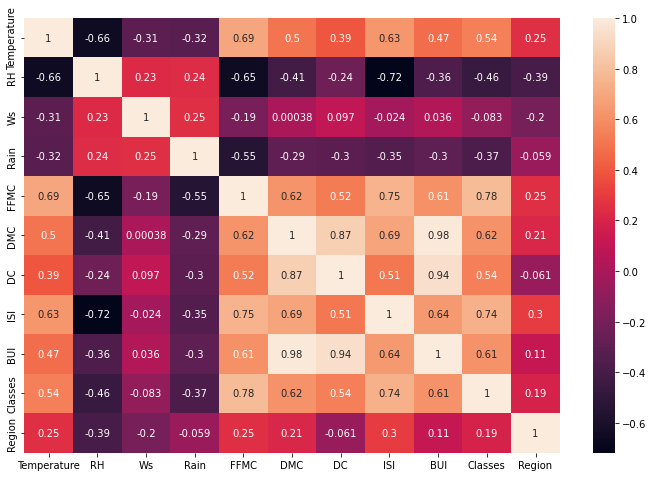

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [18]:
def correlation(data , threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [22]:
# threshold is set by domain expertise
corr_features = correlation(X_train,0.87)

In [23]:
X_train.drop(corr_features,inplace = True,axis=1)
X_test.drop(corr_features,inplace = True,axis=1)

In [24]:
X_train.shape , X_test.shape

((182, 10), (61, 10))

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

## Plotting to understand effects of StandardScaler

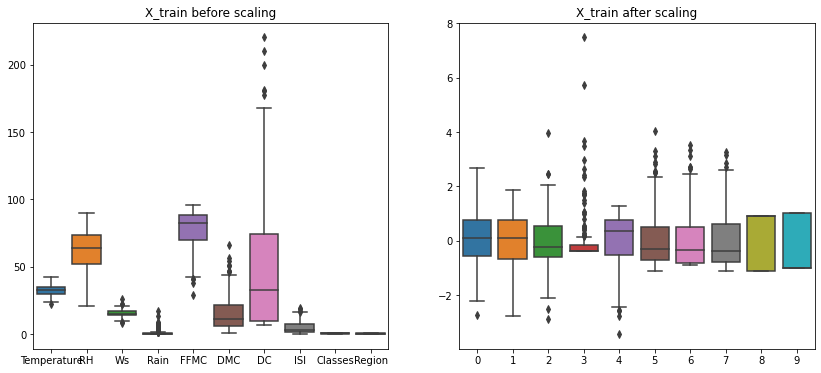

In [29]:
plt.subplots(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('X_train before scaling')
sns.boxplot(data=X_train)
plt.subplot(1,2,2)
plt.title('X_train after scaling')
sns.boxplot(data=X_train_scaled)
plt.show()

## Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regg = LinearRegression()
regg.fit(X_train_scaled,y_train)

LinearRegression()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
y_pred = regg.predict(X_test_scaled) 
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"MAE:{mae}\n MSE:{mse}\n RMSE:{np.sqrt(mse)}\n r2:{r2}")

MAE:0.5170107980662426
 MSE:0.749925803669129
 RMSE:0.8659825654533289
 r2:0.9830565611009444


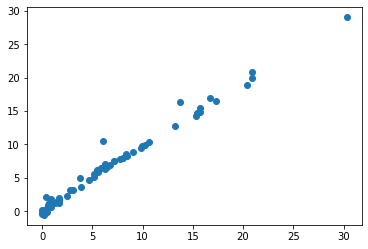

In [33]:
plt.scatter(y_test,y_pred)

In [34]:
from sklearn.linear_model import Lasso, Ridge

In [35]:
lasso = Lasso()
ridge = Ridge()

In [36]:
lasso.fit(X_train_scaled,y_train)
ridge.fit(X_train_scaled,y_train)
y_pred_lasso = lasso.predict(X_test_scaled) 
y_pred_ridge = ridge.predict(X_test_scaled) 
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)

mse_ridge = mean_squared_error(y_test,y_pred_ridge)
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
r2_ridge = r2_score(y_test,y_pred_ridge)

print(f"MAE:{mae_lasso}\n MSE:{mse_lasso}\n RMSE:{np.sqrt(mse_lasso)}\n r2:{r2_lasso}")
print(f"MAE:{mae_ridge}\n MSE:{mse_ridge}\n RMSE:{np.sqrt(mse_ridge)}\n r2:{r2_ridge}")

MAE:1.1257992990774721
 MSE:2.217755813410457
 RMSE:1.489213152443416
 r2:0.9498931628519823
MAE:0.5292519766274829
 MSE:0.7787557734922167
 RMSE:0.8824714009486181
 r2:0.9824051915524249


## Cross Validaton Lasso

In [37]:
from sklearn.linear_model import LassoCV

In [38]:
lasso_cv = LassoCV(cv=5)

In [39]:
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [40]:
y_pred_CV = lasso_cv.predict(X_test_scaled)
mse_lasso_cv = mean_squared_error(y_test,y_pred_CV)
mae_lasso_cv = mean_absolute_error(y_test,y_pred_CV)
r2_lasso_cv = r2_score(y_test,y_pred_CV)

mse_lasso_cv, mae_lasso_cv, r2_lasso_cv

(0.8310232092372641, 0.553755015349409, 0.9812242879221943)

In [43]:
len(lasso_cv.mse_path_)

100

## Similarly we can do for ElasticNet, ElasticNetCV, RidgeCV

Follow the same steps for above mentioned models to get the results

In [45]:
import pickle

In [46]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))